A2 - IVC

Bargav Jagatha

U80005052


Mounika Chowdary Akuraju

U70197123

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [91]:
video = cv2.VideoCapture(0)

while True:

    ret, frame = video.read()

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cv2.imwrite('thumbsdown.png', frame)

video.release()

cv2.destroyAllWindows()

cv2.waitKey(1)

-1

In [92]:
def erosion(image_cv, kernel_size = 4):
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,kernel_size))
    image_cv_eroded = cv2.erode(image_cv, kernel)
    
    return image_cv_eroded

def dilate(image_cv, kernel_size = 4):
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,kernel_size))
    image_cv_dilated = cv2.dilate(image_cv, kernel)
    
    return image_cv_dilated

def morph_image(image,morph, kernel_size):
    
    if morph == 'dilate':
        image_morphed = dilate(image,kernel_size = kernel_size)
        
    elif morph == 'erode':
        image_morphed = erosion(image,kernel_size = kernel_size)
    else:
        raise NotImplementedError
    return image_morphed


def get_contours(cv_image_thres):
    
    contours, hierarchy = cv2.findContours(cv_image_thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_contours(cv_image, contours,fill='line'):
    
    if fill=='solid':
        cv_image_out = cv2.drawContours(cv_image, contours, -1,(0,255,0),cv2.FILLED)
    else:
        cv_image_out = cv2.drawContours(cv_image, contours, -1,(0,255,0), 3)
        
    return cv_image_out

def get_largest_contour(contours):
    
    max_area = 0
    
    max_i = -1
    
    for i,contour in enumerate(contours):
        
        area = cv2.contourArea(contour)
        
        if area > max_area:
            max_i = i
            max_area = area
            
    return [contours[max_i]]

def show_image(image):
    
    if image.ndim == 3:
    
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        plt.imshow(img)
        
    else:
        plt.imshow(image, cmap = 'gray')

def detect_skin(frame):
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

    lower_skin = np.array([0, 145, 100], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)

    mask = cv2.inRange(ycrcb, lower_skin, upper_skin)
    
    mask = morph_image(mask, morph='erode', kernel_size=3)
    mask =  morph_image(mask, morph='dilate', kernel_size=3)

    return mask

image_masked = detect_skin(frame)

contours = get_contours(image_masked)
largest_contour = get_largest_contour(contours)
bin_img_cntr = draw_contours(image_masked, largest_contour)



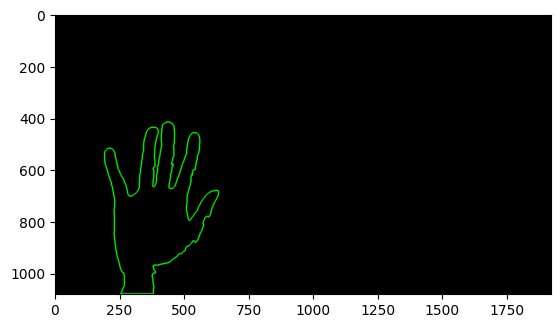

In [93]:
blank_image = np.zeros_like(bin_img_cntr)

blank_image = cv2.drawContours(cv2.cvtColor(blank_image, cv2.COLOR_GRAY2BGR), largest_contour, -1, (0,255,0), 3)

show_image(blank_image)



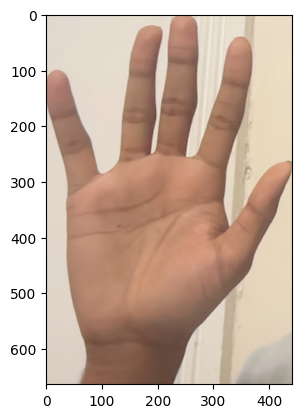

In [94]:
x, y, width, height = cv2.boundingRect(largest_contour[0])

hand_roi = frame[y:y+height, x:x+width]

show_image(hand_roi)

In [95]:
gray = cv2.cvtColor(hand_roi, cv2.COLOR_BGR2GRAY)

_, binary_mask = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

cv2.imwrite('fullhand_bintemplate1.png', binary_mask)

True